## Importing Our Dependencies

In [1]:

import numpy as np   # for matrix calculation
import matplotlib.pyplot as plt            # for visualizing the plots
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D     # convolutions layers for model training
from keras.models import Model                                                # keras model   
from keras import backend as K                                                # image processing library
import cv2
import pandas as pd                                                           # to deal with all the data analysis tasks
from sklearn.utils import shuffle
%matplotlib inline
plt.style.use('ggplot')


Using TensorFlow backend.


In [0]:
# Mounting Google Drive To Colab
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Defining Path to Dataset
image_path = "drive/My Drive/Pokemon"

In [0]:
#Listing all items of directory in a list
import os
img_names=os.listdir('drive/My Drive/Pokemon')

In [0]:
# dataset directory
data_directory = 'drive/My Drive/Pokemon'

In [0]:
# appending all the jpg file
# in the list
img_names = [os.path.join(data_directory, file_i)
              for file_i in os.listdir(data_directory)
              if '.jpg' in file_i]

In [37]:
# Total Images
len(img_names)

2240

In [0]:
# Making an empty list
# storing all the images as array
# resizing them of size 256
images_data=[]
IMG_SIZE = 256
for i in range(0,len(img_names)):
    temp=np.array(plt.imread(img_names[i]))
    temp=cv2.resize(temp,(IMG_SIZE,IMG_SIZE))
    images_data.append(temp)
    
    
images_data=np.array(images_data)
images_data=shuffle(images_data)

In [0]:
# Using 32-bit precision
# To train our Neural Net
# de divide by 255.0 to make
# ensure that the input features 
# are scaled between 0.0 and 1.0
images_data=images_data.astype('float32')/255.0

In [40]:
# Checking the shape of the data now
# 3 channels data
# of image size 256 
images_data.shape

(2240, 256, 256, 3)

In [0]:

noised_images_data=images_data.copy()

# Adding noise to images
# discrete uniform distribution
# of the blank spot

x0=np.random.randint(50,200)
y0=np.random.randint(100,150)
xl=np.random.randint(25,40)
yl=np.random.randint(25,40)
noised_images_data[:,x0:x0+xl,y0:y0+yl]=1

In [0]:
# splitting the dataset into 
# training data and test data
x_train=images_data[:1600]
x_test=images_data[1600:]

In [0]:
# splitting noised data
noised_xtrain=noised_images_data[:1600]
noised_xtest=noised_images_data[1600:]

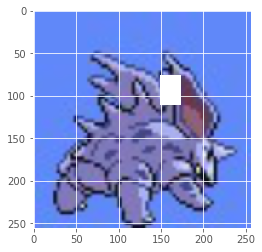

In [50]:
# Visualizing noised data
plt.imshow(noised_xtest[5])

In [51]:
# shape of the 
x_test[0].shape

(256, 256, 3)

## Building Our Neural Net Architecture

In [0]:

input_layer=Input(shape=x_test[0].shape)
num_of_codes=128


# Encoder
layer1=Conv2D(num_of_codes,(3,3),activation='relu',padding='same')(input_layer)
layer1=MaxPooling2D((2,2),padding='same')(layer1)

layer2=Conv2D(num_of_codes,(3,3),activation='relu',padding='same')(layer1)
encoded_layer=MaxPooling2D((2,2),padding='same')(layer2)

layer3=Conv2D(num_of_codes,(3,3),activation='relu',padding='same')(encoded_layer)
layer3=UpSampling2D((2,2))(layer3)

layer4=Conv2D(num_of_codes,(3,3),activation='relu',padding='same')(layer3)
layer4=UpSampling2D((2,2))(layer4)

# Decoder
decoder= Conv2D(3,(3,3),activation='relu',padding='same')(layer4)

In [54]:
noised_xtest.shape

(640, 256, 256, 3)

In [0]:
denoising_autoencoder=Model(input_layer,decoder)

In [57]:
denoising_autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

W0820 06:51:44.959705 140280244115328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 06:51:44.990076 140280244115328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0820 06:51:44.999091 140280244115328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [58]:
# We finally train the autoencoder using the
# training data with 50 epochs and batch size of 256.
denoising_autoencoder.fit(noised_xtrain, x_train,epochs=50,batch_size=50,shuffle=True,validation_data=(noised_xtest,x_test))

W0820 06:51:53.620855 140280244115328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1600 samples, validate on 640 samples
Epoch 1/50
1600/1600 [==============================] - 67s 42ms/step - loss: 0.9177 - val_loss: 0.7068
Epoch 2/50
1600/1600 [==============================] - 53s 33ms/step - loss: 0.6601 - val_loss: 0.6269
Epoch 3/50
1600/1600 [==============================] - 53s 33ms/step - loss: 0.6488 - val_loss: 0.6052
Epoch 4/50
1600/1600 [==============================] - 53s 33ms/step - loss: 0.6590 - val_loss: 0.6405
Epoch 5/50
1600/1600 [==============================] - 53s 33ms/step - loss: 0.6802 - val_loss: 0.5877
Epoch 6/50
1600/1600 [==============================] - 53s 33ms/step - loss: 0.6411 - val_loss: 0.6268
Epoch 7/50
1600/1600 [==============================] - 53s 33ms/step - loss: 0.6315 - val_loss: 0.6079
Epoch 8/50
1600/1600 [==============================] - 53s 33ms/step - loss: 0.6224 - val_loss: 0.7113
Epoch 9/50
1600/1600 [==============================] - 53s 33ms/step - loss: 0.6853 - val_loss: 0.5944
Epoch 10/50
1600/

After 30 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.56. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [0]:
# Predicting the blank spaces
prediction=denoising_autoencoder.predict(noised_xtest)

In [0]:
# Visualizing the final results
def Finalresult(n):
  plt.imshow(noised_xtest[n])
  plt.ylabel("Noised")
  plt.show()
  plt.imshow(prediction[n])
  plt.ylabel("Denoised")
  plt.show()
  plt.imshow(x_test[n])
  plt.ylabel("Without Noise")
  plt.show()

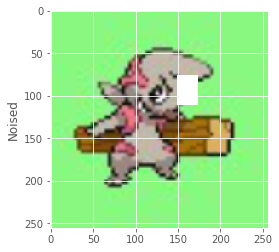

W0820 09:00:46.793294 140280244115328 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


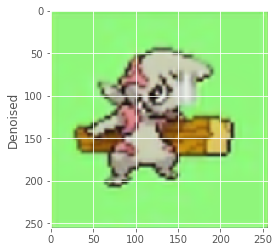

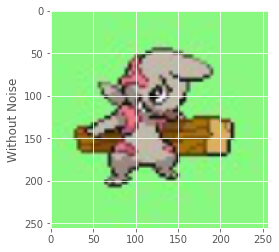

In [69]:
Finalresult(32)

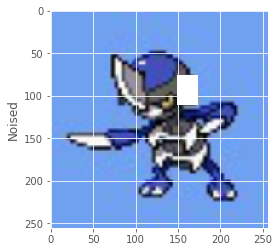

W0820 10:03:55.894752 140280244115328 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


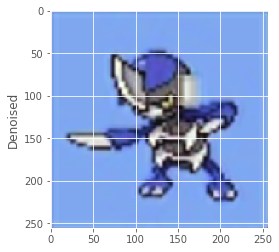

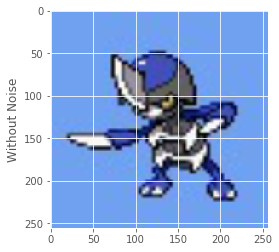

In [81]:
Finalresult(24)

In [75]:
print(x_train[0].shape)
print(x_train[0])

(256, 256, 3)
[[[0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]
  ...
  [0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]]

 [[0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]
  ...
  [0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]]

 [[0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]
  ...
  [0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]
  [0.8784314  0.65882355 0.8509804 ]]

 ...

 [[0.8666667  0.6627451  0.84313726]
  [0.8666667  0.6627451  0.84313726]
  [0.8666667  0.6627451  0.84313726]
  ...
  [0.85882354 0.6666667  0.8509804 ]
  [0.85882354 0.6666667  0.8509804 ]
  [0.85882354 0.6666667  0.8509804 ]]

 [[0.8666667  0.6627451  0.84313726]
  [0.8666667  0.6627451

W0820 09:23:22.973806 140280244115328 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0820 09:23:23.036781 140280244115328 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0820 09:23:23.123206 140280244115328 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0820 09:23:23.155945 140280244115328 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


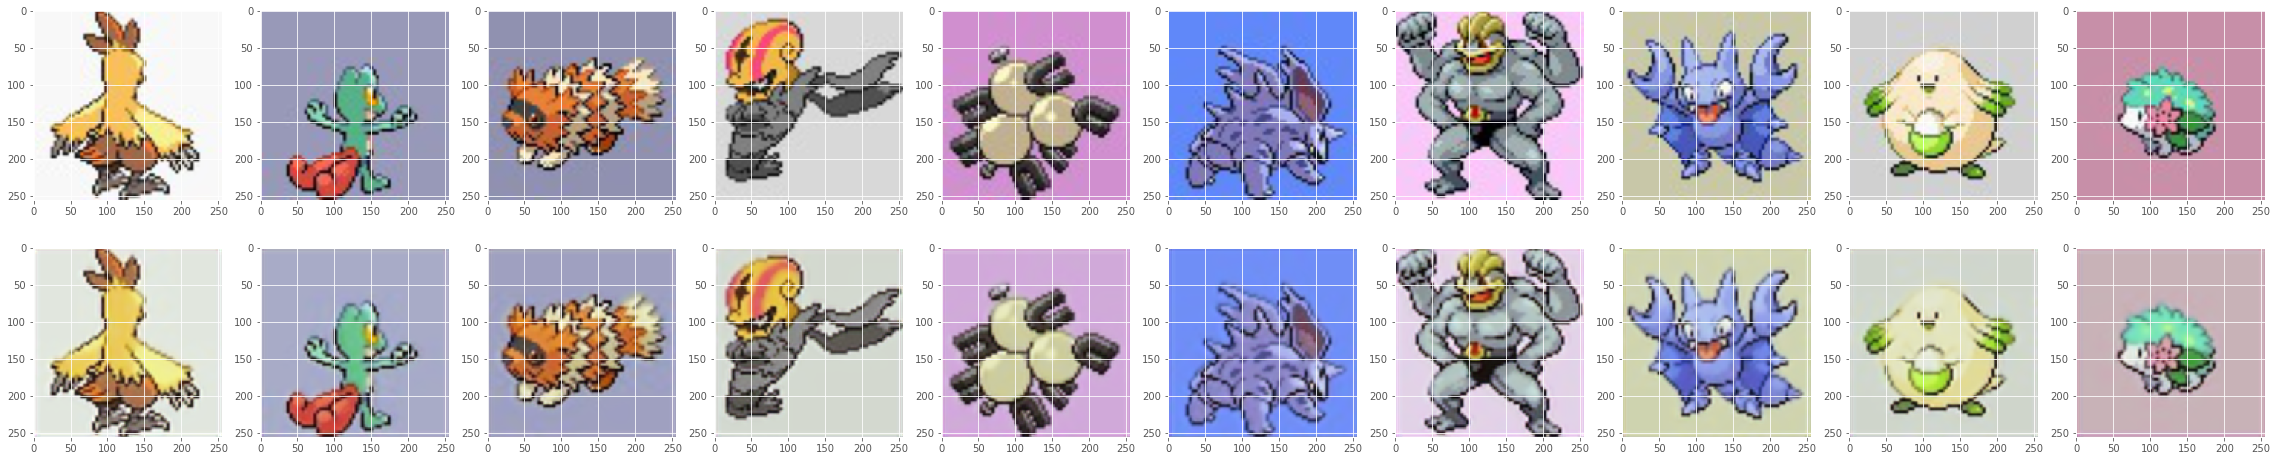

In [77]:
# encode and decode some images
# note that we take them from the *test* set
#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)

decoded_imgs = denoising_autoencoder.predict(x_test)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(40, 8))
for i in range(n):
  
  
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(256, 256,3))
    plt.gray()


    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256,3))
    plt.gray()

plt.show()